In [152]:
# check lightgbm version
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMRegressor
from matplotlib import pyplot
from lightgbm import LGBMClassifier
import lightgbm as lgb

# evaluate lightgbm ensemble for regression
from numpy import mean
from numpy import std
print(lightgbm.__version__)

2.2.3


In [153]:
def splitBySession():
  
  # importing the merged dataset from spotify
  spotifyData = pd.read_csv("spotify_merged_dataset.csv")
  # spotifyData.info()
  gby = spotifyData.groupby('session_id')
  # print(gby.agg(list))
  print(gby.agg(pd.Series.tolist).head())
splitBySession()

                                                                               Unnamed: 0  ...                                           liveness
session_id                                                                                 ...                                                   
1_00001238-3f7a-4fd2-b52e-af4237a41ed9  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  ...  [0.1122471019625663, -999.0, 0.122876264154911...
1_00001396-6ac0-4583-a3fd-c286579eda66   [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]  ...  [0.108414240181446, 0.1201553791761398, -999.0...
1_00010670-8e11-4d16-9a05-9bebd37ba758  [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 4...  ...  [0.0861334353685379, 0.2020473927259445, 0.189...
1_000157d2-9424-4240-88ae-12b9d2835e52  [52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 6...  ...  [-999.0, -999.0, -999.0, 0.0489461608231067, -...
1_00015a7d-b075-4661-85c5-e3f424344dda  [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 7...  ...  [-999.0, -999.0, -999.0, -99

In [154]:
def importDataSet():
  
  # importing the merged dataset from spotify
  spotifyData = pd.read_csv("spotify_merged_dataset.csv")
  tempDf = spotifyData

  # converting boolean output column to int 
  tempDf["skip_2"] = tempDf["skip_2"]*1
  
  y = tempDf["skip_2"].to_numpy()
  # print(tempDf.info())
  # Dropping output column and serial number column
  tempDf = tempDf.drop(tempDf.columns[[0, 1,3,4]], axis=1)
  # print(tempDf.info())

  x = tempDf.to_numpy()
  print(y)
  return spotifyData,x,y

[1 1 1 ... 0 0 1]
[10]	training's binary_logloss: 0.683855	valid_0's binary_logloss: 0.689318
[20]	training's binary_logloss: 0.679364	valid_0's binary_logloss: 0.689375
[30]	training's binary_logloss: 0.675746	valid_0's binary_logloss: 0.689704
[40]	training's binary_logloss: 0.672459	valid_0's binary_logloss: 0.689932
[50]	training's binary_logloss: 0.66979	valid_0's binary_logloss: 0.690301
[60]	training's binary_logloss: 0.666688	valid_0's binary_logloss: 0.690437
[70]	training's binary_logloss: 0.663952	valid_0's binary_logloss: 0.690874
[80]	training's binary_logloss: 0.66141	valid_0's binary_logloss: 0.691367
[90]	training's binary_logloss: 0.659158	valid_0's binary_logloss: 0.691994
[100]	training's binary_logloss: 0.656386	valid_0's binary_logloss: 0.692546
[1 0 1 ... 1 1 1]
0.5341212121212121


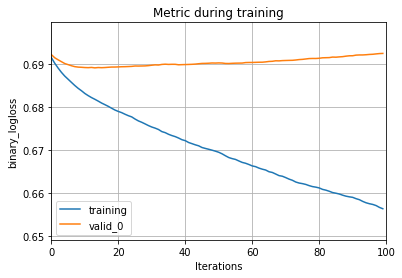

In [155]:
# Test train Split
spotifyData,X,Y = importDataSet()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

model = LGBMClassifier()
# model.fit(X_train, y_train)
model.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)], verbose=10)
lgb.plot_metric(model)
# Predicting the Target variable
pred = model.predict(X_test)
print(pred)
accuracy = model.score(X_test, y_test)
print(accuracy)
# lgb.plot_metric(model)

In [156]:
# model = LGBMRegressor()
# # evaluate the model
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [157]:
# print(n_scores)

In [158]:
# def evaluate_model(model):
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# 	return scores

In [159]:
# def get_models():
# 	models = dict()
# 	for i in range(1,11):
# 		models[str(i)] = LGBMClassifier(max_depth=i, num_leaves=2**i)
# 	return models

In [160]:
# spotifyData,X,Y = importDataSet()
# print(X.shape)
# models = get_models()

# results, names = list(), list()
# for name, model in models.items():
# 	scores = evaluate_model(model)
# 	results.append(scores)
# 	names.append(name)
# 	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()